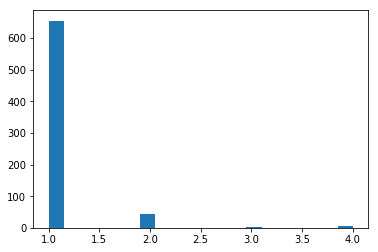

In [1]:
#q3
from bs4 import BeautifulSoup
from urllib.request import urlopen
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

actorsArr = []
url = []
moviesNum = []
length = 0

histoActors = []
histoMovies = []

pageFile = urlopen("https://en.wikipedia.org/wiki/Julia_Roberts_filmography")

pageHtml = pageFile.read()

pageFile.close()
soup = BeautifulSoup(pageHtml, 'html.parser')

sAll = soup.findAll('table')
sAll = sAll[0].contents[1].findAll('i')
for a in sAll:   # find all Julia Robberts' movies
    filmurl = a.findAll("a")
    if len(filmurl) == 0:
        continue
    filmurl = filmurl[0].get('href')
    pageFile2 = urlopen("https://en.wikipedia.org" + filmurl)

    pageHtml2 = pageFile2.read()

    pageFile2.close()
    soup2 = BeautifulSoup(pageHtml2, 'html.parser')
    sAll2 = soup2.findAll("div", attrs={"id": "mw-content-text"})[0].contents
    try:
        for x in sAll2:   # find all the actors for each movies
            h2 = x.find("span", attrs={"id": ["cast", "Principal_cast", "Main_cast", "Cast"]})
            test = h2.find_next(['table', 'ul']).findAll(['td', 'li'])
            if test[0].name == "td":
                for y in range(0, len(test), 2):
                     if test[y].text not in actorsArr:
                        length = length + 1
                        actorsArr.append(test[y].text)
                        href = test[y].findAll("a")
                        moviesNum.append(1)
                        if len(href) > 0:
                            url.append("https://en.wikipedia.org" +href[0].get("href"))
                        else:
                            url.append("")
                else:
                        moviesNum[actorsArr.index(test[y].text)] = moviesNum[actorsArr.index(test[y].text)] + 1

                break
            else:
                for y in range(0, len(test)):
                    tmpurl = ""
                    tmpname = ""
                    href = test[y].findAll("a")
                    if len(href) > 0:
                        tmpurl = "https://en.wikipedia.org" + href[0].get("href")
                        tmpname = href[0].get("title")
                    else:
                        tmpname = test[y].text
                    if tmpname not in actorsArr:
                        length = length + 1
                        url.append(tmpurl)
                        actorsArr.append(tmpname)
                        moviesNum.append(1)
                    else:
                        moviesNum[actorsArr.index(tmpname)] = moviesNum[actorsArr.index(tmpname)] + 1

                break
    except:
        pass

for i in range(0, len(url)):   # finding all information about the actors
    dont = True
    awardsuml = "https://en.wikipedia.org/wiki/List_of_awards_and_nominations_received_by_"
    if url[i] != "":
        try:
            pageFile3 = urlopen(url[i])
            pageHtml3 = pageFile3.read()
            pageFile3.close()
        except:
            pageHtml3 = None
            dont = False
        if dont:
            soup3 = BeautifulSoup(pageHtml3, 'html.parser')
            sAll3 = soup3.find('table', attrs={'class': "infobox biography vcard"})
            if sAll3 is None:
                sAll3 = soup3.find('table', attrs={'class': "infobox vcard plainlist"})
            if sAll3 is None:
                dont = False
            if dont:
                bday = sAll3.find('span', attrs={'class': "bday"})
                if bday is None:
                    bday = sAll3.find('th', text= "Born")
                    if not bday is None:
                        bday = bday.find_next('td')
                if bday is None:
                    bday = ""
                else:
                    bday = bday.text
                bplace = sAll3.find('div', attrs={'class': "birthplace"})
                if bplace is None:
                    bplace = sAll3.find('th', text="Residence")
                    if bplace is None:
                        bplace = sAll3.find('th', text="Origin")
                    if not bplace is None:
                        bplace = bplace.find_next('td')
                if not bplace is None:
                    bplace = bplace.text
                else:
                    bplace = ""
    tmpawardurl = awardsuml + actorsArr[i].replace(' ', '_')
    try:
        pageFile4 = urlopen(tmpawardurl)
        pageHtml4 = pageFile4.read()
        pageFile4.close()
    except:
        continue
    soup4 = BeautifulSoup(pageHtml4, 'html.parser')
    soup4 = soup4.find("div", attrs={"id": "mw-content-text"})
    soups4 = soup4.findAll("table", attrs={"class": "wikitable"})
    tmpaward = 0
    for tmpsoup in soups4:
        tmpsoups = tmpsoup.findAll("td", attrs= {"class": "yes table-yes2"})
        tmpaward = tmpaward + len(tmpsoups)


    for act in actorsArr:
        if act not in histoActors and act != 'Julia Roberts':
            histoActors.append(act)
            histoMovies.append(moviesNum[actorsArr.index(act)])

data = {
    'actor': histoActors,
    'Number of movies with julia': histoMovies
}

df = pd.DataFrame(data)
df
%matplotlib inline
arr = sorted(histoMovies)
myarray = np.array(arr)
plt.hist(myarray, bins=20)
plt.show();